# Lab Two: Astronomy With The 21-cm Line; Some Microwave Electronics
## By Cee, Grace, Scout, Adam

#### We'll measure the 21cm line twice. For the first, the goal is to master the technical aspects and familiarize ourselves with the system and procedures, so instead of worrying about where to point the horn we'll just take whatever position happens to be overhead. For the second, we'll manuall point the horn to a designated position and make a calibrated profile to compare with a well-established profile measurement.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio
import powerspectrum as pwerSpec

# 6.1 The Recieving System
We will use a double heterodyne system for the 21-cm line at 1420.4 MHz. Double heterodyne means we have two mixing stages.
1. For the first mixer, use the ordinary DSB technique. LO = 1230.0 MHz. The difference frequency will be 190.4 MHz and the sum frequency is 2650.4. We use a 20 MHz-wide bandpass filter centered at 190 MHz to obliterate the sum frequency, so we are left with a replica of the 21-cm line that is centered at 190.4 instead of 1420.4 MHz.

2. For the second mixer use the SSB technique. LO = 190.0MHz, so the output frequencies are positive and negative centered at zero; this is called the baseband. In the absense of a Doppler shift, we are left with the line centered at 0.4 MHz. However, the line is shifted and broadened by galactic rotation and the Earth's orbital velocity, so it covers a range of frequency of 1420.2+=0.5 MHz. We use a low pass filter with a cutoff frequency of 2MHz to eliminate alaiasing, sample the complex signal, and Fourier transform to calculate power spectrum. We take many power spectra and average them to reduce the noise.

## 6.2 Your Measurement
# 1.
Set the system up to observe. Point the horn to the zenith to reduce interference and thermal noise. We use a low pass filter with a cut off frequency of 2 MHz to eliminate aliasing, sample the complex signal, and Fourier transform to calculate the power spectrum. We take many power spectra and average them to reduce noise.

Take some data. How fast must you sample?

We need 2MHz, and Nyquist says we should sample at least twice as much if not more. Say we want 8MHz to be safe. 62.5/8 = 7.8.

#Take 10 samples and average them

data = []
for i in range(10):
    
    test = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000) #Sdual_mode:sample from A and B ports if True
    data.append(test)

avg = sum(data) / len(data)

np.savetxt('lab2_avg_sampledata_2.18',avg)
np.savetxt('lab2_single_sampledata_2.18', data[0])

In [ ]:
avg = np.loadtxt('lab2_avg_sampledata_2.18')
avg_signal = pwerSpec.powerspec(complexnumber, 8, 16000)

In [62]:
data_0 = np.loadtxt('lab2_single_sampledata_2.18')
real = data_0[:len(data_0)/2]
imag = data_0[len(data_0)/2: len(data_0)]
complexnumber = real + (imag * 1j)
single_signal_complex = pwerSpec.powerspec(complexnumber, 8, 16000)
single_signal_imag = pwerSpec.powerspec(imag, 8, 16000)
single_signal_real = pwerSpec.powerspec(real, 8, 16000)

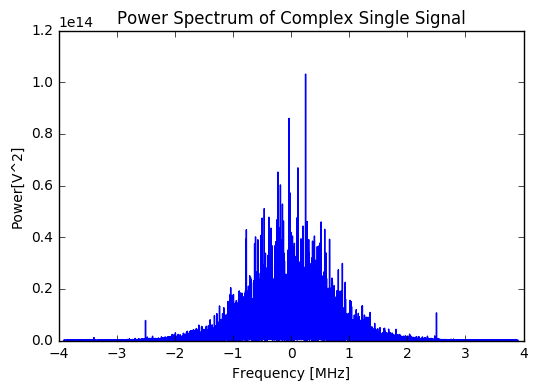

('Median of dataset: ', 0.25074809363085127)


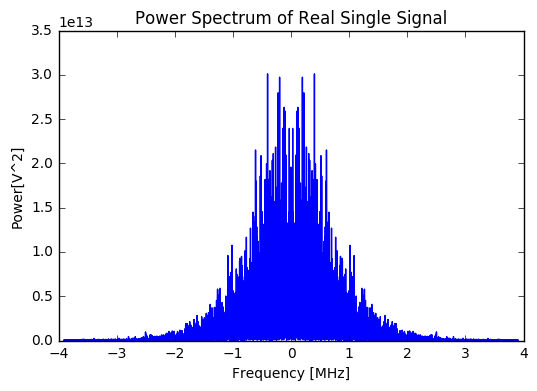

('Median of dataset: ', 0.25074809363085127)


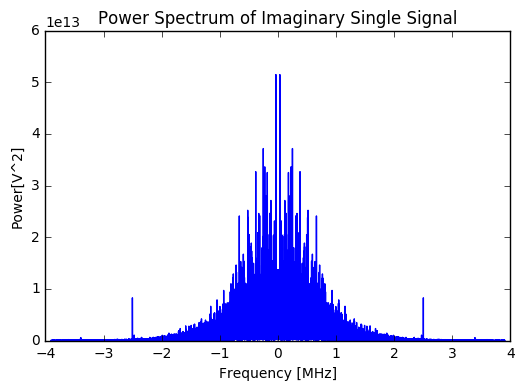

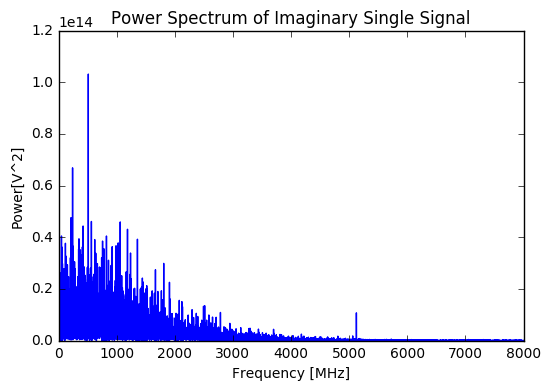

In [98]:
#Complex Single signal
plt.plot(single_signal_complex[1],single_signal_complex[0])
plt.title("Power Spectrum of Complex Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()

print('Median of dataset: ', single_signal_complex[1][np.argmax(single_signal_complex[0])])

#Real Single signal
plt.plot(single_signal_real[1],single_signal_real[0])
plt.title("Power Spectrum of Real Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()

print('Median of dataset: ', single_signal_complex[1][np.argmax(single_signal_complex[0])])

#Imaginary Single signal
plt.plot(single_signal_imag[1],single_signal_imag[0])
plt.title("Power Spectrum of Imaginary Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()

#Imaginary Single signal
plt.plot(single_signal_complex[0][len(single_signal_complex[0])/2:len(single_signal_complex[0])])#,single_signal_complex[0])
plt.title("Power Spectrum of Imaginary Single Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.show()


# 2. 
Look at the range of sample values by plotting a bunch of them. Best is to make a histogram. The sampled numbers should cover plenty of of bits, quantization should only be barely, or not at all, evident in the histogram. The histogram shape should be a well known function. Which function? Does it?

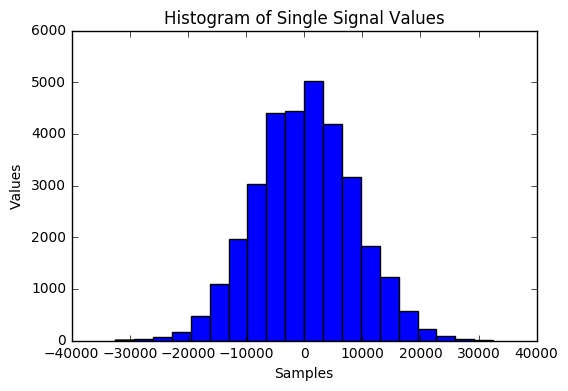

In [81]:

#Histogram
plt.hist(data_0, bins = 20)
plt.title("Histogram of Single Signal Values")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.show()


# 3.
Insert a test signal so that it appears in the upper sideband and take some data; then change the test signal frequency so it's in the lower sideband. You'll use this to make sure the SSB mixer is doing its job properly, and to determine whether the frequency axis is flipped.

test = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000)
np.savetxt('test_1_signal_2.18', test)

In [ ]:
test_2 = np.loadtxt('test_1_signal_2.18')
test_2 = pwerSpec.powerspec(test_2, 8, 16000)

test_1 = np.loadtxt('test_signal_2.18')
test_1 = pwerSpec.powerspec(test_1, 8, 16000)

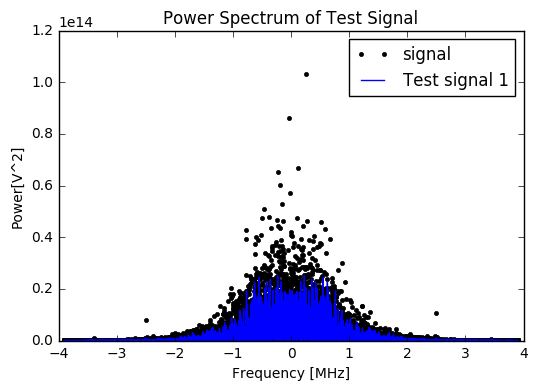

In [80]:
#plt.plot((test_2)[1],(test_2)[0], label = 'Test signal 2')
plt.plot(single_signal_complex[1],single_signal_complex[0], 'k.', label = 'signal')
plt.plot((test_1)[1], (test_1)[0], label = 'Test signal 1')



plt.title("Power Spectrum of Test Signal")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Power[V^2]")
plt.legend()
plt.show()

#plt.show()

# Time to do Astronomy

For the first measurement the main goal is to master the technical aspescts, so use whatever position is overhead and point the horn straight up. The line will be strongest for the approximate range LST = 19-6 hr.

In [8]:
lst_now = ugradio.timing.lst() #current LST at NCH

It is most convenient to use the temperature units for the power that wemeasure. Accordingly, the power that we measure is called the system temperature, Tsys. It's a function of frequency ans has two kinds of behavior: the continuum, which is devoid of spectral features and it changes very slowly with frequcny; and the line, which in this case is the 21-cm line and it changes relatively rapidly with frequency--hencoue our desire to obtain the line shape. 

The system temperature has two contributions: the dominant contribution from our electonics, which we call the reciever temperature Trx; and the contribution our antenna picks up from the sky, the sky temperature Tsky. Thus Tsys = Trx + Tsky, and above 150 MHz, usually Trx >> Tsky.

Our horn is equipped with an old, noisy first amplifier so Trx ~ 300K; in contrast, our Leushner telescope is much better, with Trx ~ 50 K. The sky temperature comes from the Cosmic Microwave Background, with brightness temperature Tcmb = 2.7K; from intergalactic space, with brightness temperature Tastro (no more than a few K in continuum and u pto 100K in the HI line frequency. So off the HI line we have Tsky ~ 10K and on the HI line, in the Galactic place where it is strongest, we have Tsky ~ 100K.

We'll take two sets of data (1) a long integration to measure the line's shape and (2) a short integration so we can calibrate the line's intensity.

2. Intensity calibration requires a second pair of measurements, which can be short. Easiest is probably to take one with the horn looking at a known blackbody and one looking at the cold sky. Take a short measurement with the horn pointing straight up at the cold sky and the other with as many people as you can find standing in front of it to fill the aperature. Call these spectra sCold and sCal respectivly.

skydata = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000)
np.savetxt('sCold-2-24-19.txt', skydata)

In [37]:
sCold = np.loadtxt('sCold-2-24-19.txt')
real = sCold[:len(sCold)/2]
imag = sCold[len(sCold)/2: len(sCold)]
complexnumber = real + (imag * 1j)

sky_pspec = pwerSpec.powerspec(complexnumber, 8, 16000)


persondata = ugradio.pico.capture_data('50mV', divisor = 8, dual_mode = True, nsamples = 16000)
np.savetxt('sPerson(1)-2-24-19.txt', persondata)

In [39]:
sPerson = np.loadtxt('sPerson-2-24-19.txt')
real = sPerson[:len(sPerson)/2]
imag = sPerson[len(sPerson)/2: len(sPerson)]
complexnumber = real + (imag * 1j)

person_pspec = pwerSpec.powerspec(complexnumber, 8, 16000)

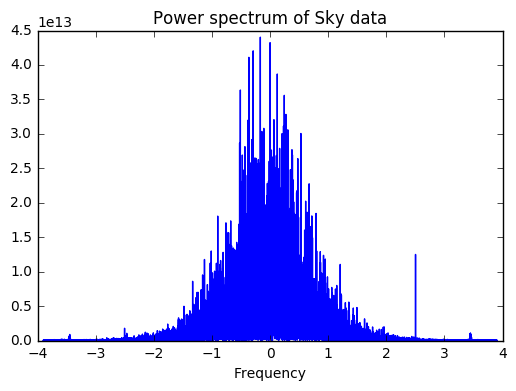

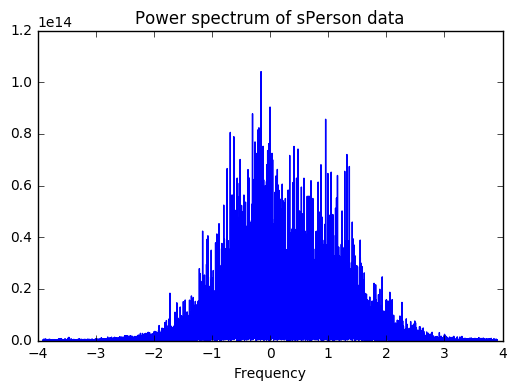

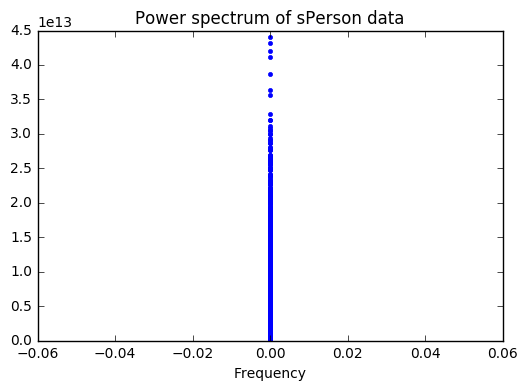

In [61]:
plt.subplot()

plt.plot(sky_pspec[1], sky_pspec[0])
plt.title('Power spectrum of Sky data')
plt.xlabel('Frequency')
plt.show()

plt.plot(person_pspec[1], person_pspec[0])
plt.title('Power spectrum of sPerson data')
plt.xlabel('Frequency')
plt.show()

plt.plot((sky_pspec[1] - person_pspec[1]), sky_pspec[0], '.')
plt.title('Power spectrum of sPerson data')
plt.xlabel('Frequency')
plt.show()

In [110]:
everything = np.load('lower_block_10.npy')

In [116]:
#How to take an average of power spectrums

all_files = []

for integer in range(1000):
    data = everything[integer*32000 : 32000 * (integer +1)]
    all_files.append(data)


In [148]:
print(len(all_files[0]))

32000


In [152]:
power_arrays = []

for data in all_files:
    real = data[:len(data)/2]
    imag = data[len(data)/2:len(data)]
    complex_data = real + (imag * 1j)
    voltage = np.fft.fft(complex_data)
    power = np.abs(voltage)**2
    
    power_arrays.append(power)
    

In [134]:
current_sum = []

for data in range(len(power_arrays)):
    current_sum = current_sum + power_arrays[data]

4.85811169414e+16


In [153]:
print(len(power_arrays[0]))

16000


In [154]:
avg = sum(power_arrays) / len(power_arrays)

In [155]:
print(len(avg))

16000


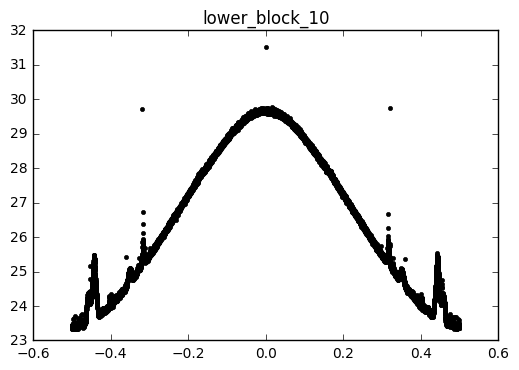

In [170]:
frequency = np.fft.fftfreq(len(avg))
plt.plot(frequency, np.log(avg), 'k.')
plt.title('lower_block_10')
#plt.ylim(0, 1)
plt.show()

In [160]:
np.fft.fftfreq??